#WTF23 DATA SCIENCE AND ARTIFICIAL INTELLIGENCE
#GROUP C SUBGROUP 1 
#FIRST PROJECT ON PYTHON

# GOOGLE APPS REVIEWS AND EXPLORATION
**App Profiles for Google Play**

Our aim in this project is to explore mobile app profiles for the Google Play markets. Our goal for this project is to analyze data to help our developers understand what kinds of apps are likely to attract more users.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from csv import reader
from google.colab import files
uploaded = files.upload()

Saving Ggleplaystore.csv to Ggleplaystore (1).csv


In [ ]:
apps = pd.read_csv('Ggleplaystore.csv')
apps.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Checking column names in the dataset
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#DATA CLEANING





### Clean the Installs and Price columns by removing the characters in them

In [ ]:
#define the columns to clean
cols_to_clean = ['Installs','Price']

# define the characters to remove
chars_to_remove = ['+',',','$']

#loop through the cols list
for col in cols_to_clean:
  #loop through the chars list
  for char in chars_to_remove:
    #Replace the character with an empty string
    apps[col] = apps[col].apply(lambda x : x.replace(char,''))

apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#check for duplicates
apps.duplicated().sum()


483

In [ ]:
 # drop the duplicates
 apps = apps.drop_duplicates()

In [ ]:
#check for missing values
apps.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#drop duplicates in selected columns
apps = apps.dropna(subset = ["Type", "Content Rating","Current Ver", "Android Ver"])
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
#summary statistics of the Rating column
apps.describe()

,Rating
count,8886.000000
mean,4.187959
std,0.522428
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [ ]:
apps["Rating"]= apps["Rating"].fillna(apps["Rating"].mean())
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
apps["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10346, dtype: object

# CORRECTING DATA TYPES AND EDA

### Change the columns Installs and Price to float


In [28]:
#Installs column to float
apps['Installs'] = apps['Installs'].astype('int')

#Price column to float
apps['Price'] = apps['Price'].astype('float')

# Rating column to object
apps['Rating'] = apps['Rating'].astype('float')

#check the apps info for changes
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10346 non-null  object        
 1   Category        10346 non-null  object        
 2   Rating          10346 non-null  float64       
 3   Reviews         10346 non-null  object        
 4   Size            10346 non-null  object        
 5   Installs        10346 non-null  int64         
 6   Type            10346 non-null  object        
 7   Price           10346 non-null  float64       
 8   Content Rating  10346 non-null  object        
 9   Genres          10346 non-null  object        
 10  Last Updated    10346 non-null  datetime64[ns]
 11  Current Ver     10346 non-null  object        
 12  Android Ver     10346 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.1+ MB


# change Last Updated Datatype to datetime


In [ ]:
apps['Last Updated']= pd.to_datetime(apps['Last Updated'], infer_datetime_format= True, errors='coerce')

In [ ]:
apps['Last Updated'].sort_values(ascending=True)

7479    2010-05-21
7430    2011-01-30
10282   2011-03-16
8418    2011-04-11
8084    2011-04-16
           ...    
10408   2018-08-08
10712   2018-08-08
10760   2018-08-08
10209   2018-08-08
10718   2018-08-08
Name: Last Updated, Length: 10346, dtype: datetime64[ns]

# EDA OF DATA SET USING DISTRIBUTION PLOTS, SCATTER PLOTS AND CORRELATION MATRIX DISTRIBUTION PLOTS

In [ ]:
# Distribution plots of graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(apps, nGraphShown, nGraphPerRow):
    nunique = apps.nunique()
    apps = apps[[col for col in apps if nunique[col] > 1 and nunique[col] < 30]] # For displaying purposes, pick columns that have between 1 and 30 unique values
    nRow, nCol = apps.shape
    columnNames = list(apps)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 60, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnapps = apps.iloc[:, i]
        if (not np.issubdtype(type(columnapps.iloc[0]), np.number)):
            valueCounts = columnapps.value_counts()
            valueCounts.plot.bar()
        else:
            columnapps.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


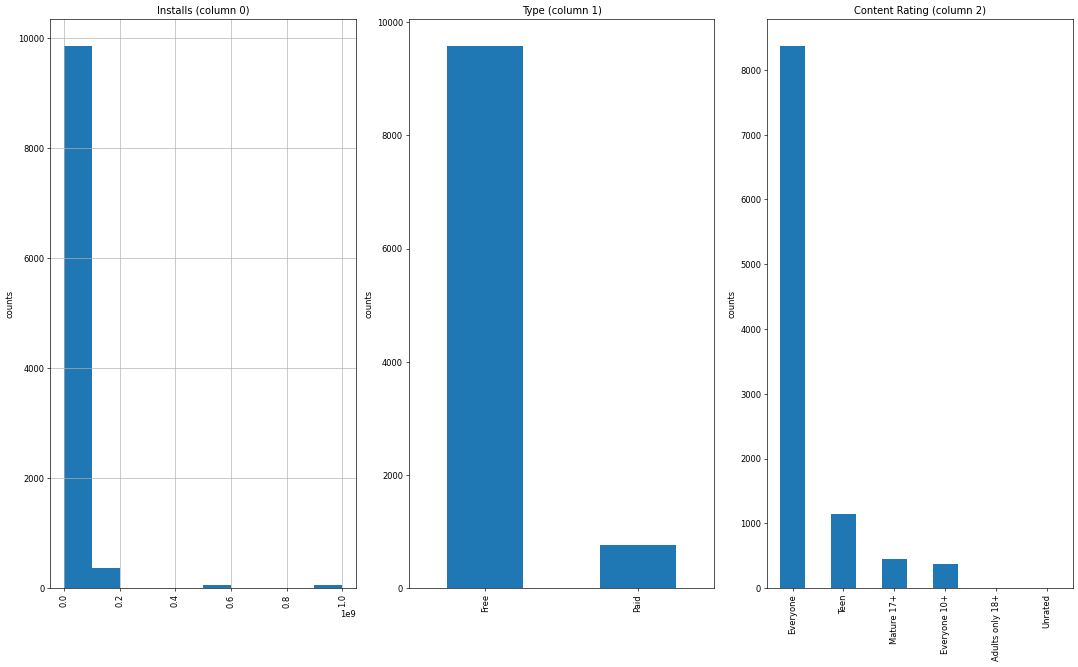

In [ ]:
## Call the column distribution plots
plotPerColumnDistribution(apps, 10, 5)

In [ ]:
# Scatter and density plots
def plotScatterMatrix(apps, plotSize, textSize):
    apps = apps.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to data frame being singular
    apps = apps.dropna('columns')
    apps = apps[[col for col in apps if apps[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(apps)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    apps = apps[columnNames]
    ax = pd.plotting.scatter_matrix(apps, alpha=0.65, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = apps.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


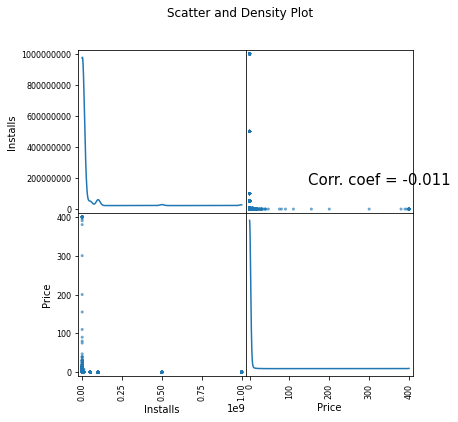

In [ ]:
## Call the scatter and density plot
plotScatterMatrix(apps, 6, 15)

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(apps, graphWidth):
    filename = apps
    apps = apps.dropna('columns') # drop columns with NaN
    apps = apps[[col for col in apps if apps[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if apps.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({apps.shape[1]}) is less than 2')
        return
    corr = apps.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


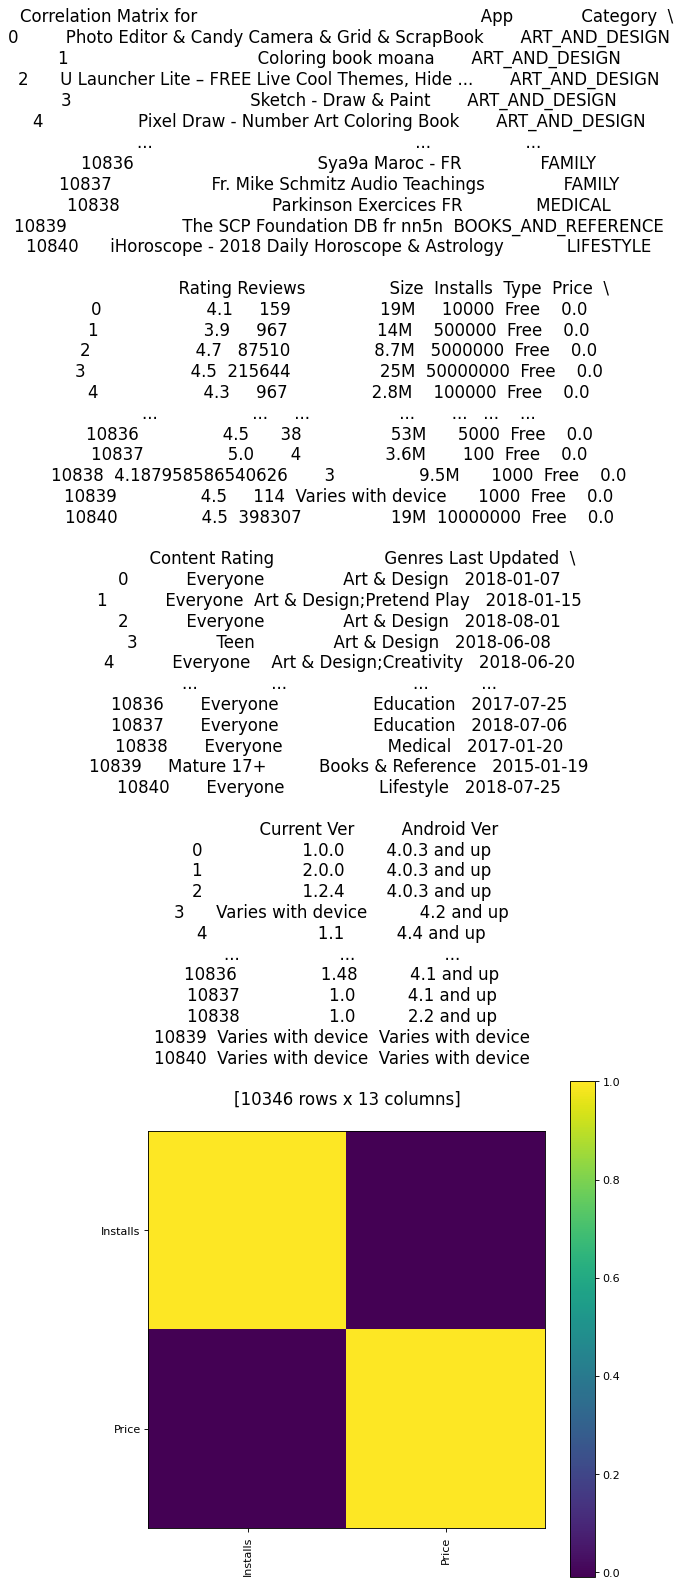

In [ ]:
### Call the correlation matrix plot
plotCorrelationMatrix(apps, 8)


CORRELATION HEATMAP PLOT OF PRICE, RATINGS AND INSTALATIONS

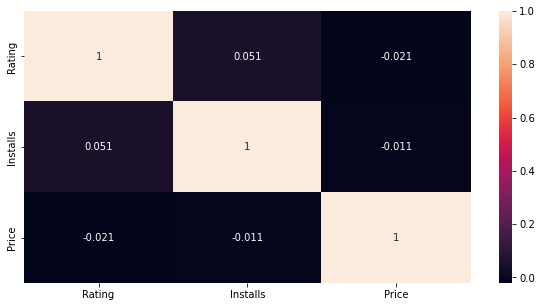

In [31]:
#Correlation Heatmap
plt.figure(figsize=(10,5))
corr= apps.corr()
sns.heatmap(corr, annot=True)
plt.show()

HISTOGRAM PLOT OF AVERAGE APPS RATING

In [24]:
px.histogram(apps, x="Rating", marginal='box')

BAR PLOT OF TYPES OF APPS

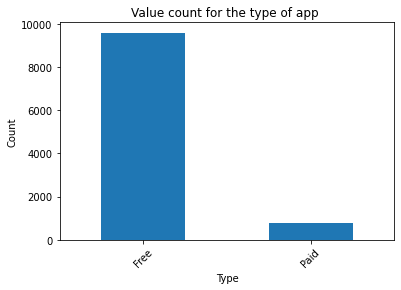

In [30]:
apps["Type"].value_counts().plot.bar()
plt.ylabel("Count")
plt.xlabel("Type")
plt.title("Value count for the type of app ")
plt.xticks(rotation=45)

plt.show()

AVERAGE RATING OF PAID AND FREE APPS

In [29]:
print('Average rating of Free apps',round(apps.loc[apps['Type']=='Free','Rating'].mean(),2))
print('Average rating of paid apps',round(apps.loc[apps['Type']=='Paid','Rating'].mean(),2))
px.box(apps, x='Type',y='Rating')

Average rating of Free apps 4.18
Average rating of paid apps 4.25


HIGHEST AND LOWEST NUMBER OF APPS PER CATEGORY

In [33]:
no_of_apps = apps.groupby('Category',as_index=False)['App'].count().sort_values('App',ascending=False)

diag = px.bar(no_of_apps,x='Category',y='App',title='Number/Category',text_auto='.2s')

diag.update_traces(textfont_size=12,textangle=0,textposition='outside',cliponaxis=False)

MOST POPULAR APPS BY GENRE